In [1]:
from GeneralGlobalModel_Class import GlobalModel
import Reactions_He as R
import matplotlib.pyplot as plt
import numpy as np

me=9.11e-31
mp=1.67e-27
q=1.6e-19

In [2]:
reactions=R.reactions
gm=GlobalModel(reactions,[4*mp,0])

### Reacciones

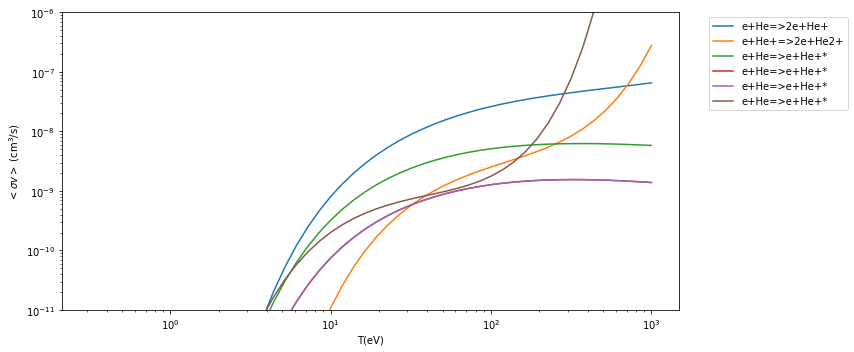

In [3]:
%matplotlib inline
figure=plt.figure(figsize=(12,5))
elog=np.logspace(-0.5,3)
for i in range (len(reactions)):
    r=reactions[i]
    if r[1]!='surface':
        plt.plot(elog,r[5](elog),label=r[0])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-11,1e-6)
plt.xlabel('T(eV)')
plt.ylabel('$<\sigma v>$ (cm$^{3}$/s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures\Cs.pdf')

In [19]:
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

def Find_solutions(pwr,n): #cambia la init. La especie neutra en mayor concentración. O que la init se pueda cambiar desde fuera o que sea un input del objeto
        e0=10
        init=n/100*np.ones(4)
        init[-1]=e0
        sol=fsolve(gm.Eq_system,init,args=(pwr,n),full_output=1)
        converge=sol[2]
        while (converge!=1)&(e0<20000):
            e0=e0*1.1
            init=n/100*np.ones(4)
            init[-1]=e0
            sol=fsolve(gm.Eq_system,init,args=(pwr,n),full_output=1)
            converge=sol[2]
        sol1=sol
        converge=0
        while (converge!=1)&(e0<20000):
            e0=e0*1.2
            init=n/100*np.ones(4)
            init[-1]=e0
            sol=fsolve(gm.Eq_system,init,args=(pwr,n),full_output=1)
            converge=sol[2]
            if np.abs(sol[0][3]-sol1[0][3])<0.1:
                converge=0
        sol2=sol
        return sol1,sol2

    
n0=np.logspace(13.85,14.3,10)
es1=np.array([])
es2=np.array([])
for ni in n0:
    sol1,sol2=Find_solutions(1e6,ni)
    es1=np.append(es1,sol1[0][3])
    es2=np.append(es2,sol2[0][3])
es2=np.flip(es2)
n02=np.flip(n0)
ns=np.concatenate((n02,n0))
es01=np.concatenate((es2,es1))

Text(0, 0.5, '$n_{H_2}$(cm^-3)')

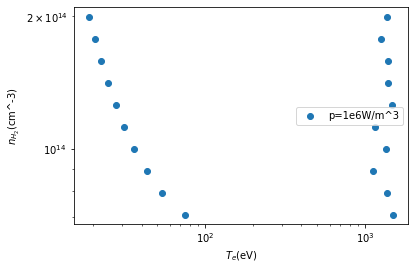

In [20]:
plt.scatter(es01,ns,label='p=1e6W/m^3')
#plt.plot(es02,ns,label='p=5e6W/m^3')
#plt.plot(es03,ns,label='p=1e7W/m^3')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$T_e$(eV)')
plt.ylabel('$n_{H_2}$(cm^-3)')

### Graficas 1D

Text(0.5, 0, '$n_0$ (cm$^{-3}$)')

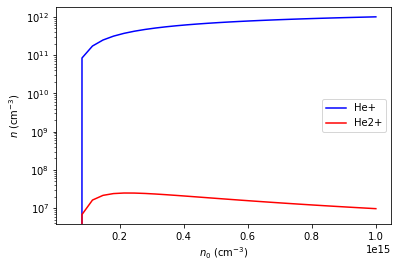

In [4]:
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(5e6,5e13,1e15,30)
plt.plot(n,n1,color='blue',label='He+')
plt.plot(n,n2,color='red',label='He2+')
plt.yscale('log')
plt.legend()
plt.ylabel('$n$ (cm$^{-3}$)')
plt.xlabel('$n_0$ (cm$^{-3}$)')

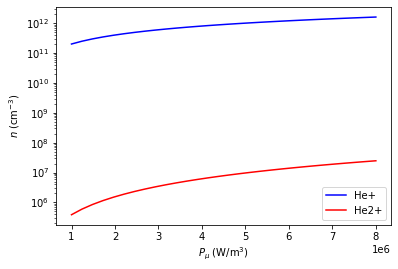

In [5]:
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(1e15,1e6,8e6,30)
plt.plot(p,n1,color='blue',label='He+')
plt.plot(p,n2,color='red',label='He2+')
plt.yscale('log')
plt.ylabel('$n$ (cm$^{-3}$)')
plt.xlabel('$P_\mu$ (W/m$^{3}$)')
plt.legend()

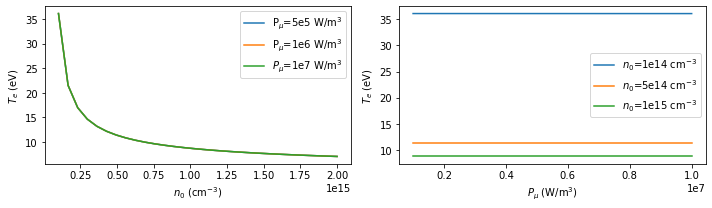

In [6]:
nmin,nmax=1e14,2e15
pmin,pmax=1e6,1e7
N=30
p01,p02,p03=5e5,1e6,5e6
n01,n02,n03=1e14,5e14,1e15
'''
_______________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(10,3))
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(p01,nmin,nmax,N)
ax[0].plot(n,e,label='P$_\mu$=5e5 W/m$^{3}$')
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(p02,nmin,nmax,N)
ax[0].plot(n,e,label='P$_\mu$=1e6 W/m$^{3}$')
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(p03,nmin,nmax,N)
ax[0].plot(n,e,label='$P_\mu$=1e7 W/m$^{3}$')
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(n01,pmin,pmax,N)
ax[1].plot(p,e,label='$n_0$=1e14 cm$^{-3}$')
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(n02,pmin,pmax,N)
ax[1].plot(p,e,label='$n_0$=5e14 cm$^{-3}$')
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(n03,pmin,pmax,N)
ax[1].plot(p,e,label='$n_0$=1e15 cm$^{-3}$')

ax[0].set_ylabel('$T_e$ (eV)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$T_e$ (eV)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures\Te_lines.pdf')

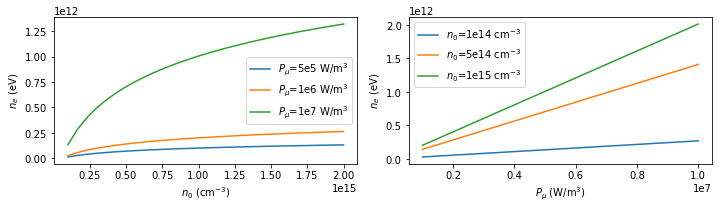

In [7]:
nmin,nmax=1e14,2e15
pmin,pmax=1e6,1e7
N=30
p01,p02,p03=5e5,1e6,5e6
n01,n02,n03=1e14,5e14,1e15
'''
__________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(10,3))
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(p01,nmin,nmax,N)
ax[0].plot(n,ne,label='$P_\mu$=5e5 W/m$^{3}$')
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(p02,nmin,nmax,N)
ax[0].plot(n,ne,label='$P_\mu$=1e6 W/m$^{3}$')
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(p03,nmin,nmax,N)
ax[0].plot(n,ne,label='$P_\mu$=1e7 W/m$^{3}$')
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(n01,pmin,pmax,N)
ax[1].plot(p,ne,label='$n_0$=1e14 cm$^{-3}$')
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(n02,pmin,pmax,N)
ax[1].plot(p,ne,label='$n_0$=5e14 cm$^{-3}$')
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(n03,pmin,pmax,N)
ax[1].plot(p,ne,label='$n_0$=1e15 cm$^{-3}$')

ax[0].set_ylabel('$n_e$ (eV)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$n_e$ (eV)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures/Ne_lines.pdf')

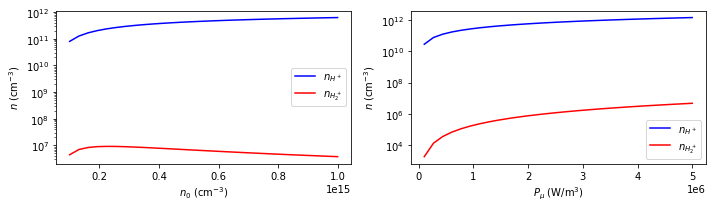

In [14]:
p0=3e6
n0=2e15
pmin,pmax=1e5,5e6
nmin,nmax=1e14,1e15
N=30
'''
_________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(10,3))
n,[ne,n1,n2,e]=gm.Find_solution_n_sweep(p0,nmin,nmax,N)
ax[0].plot(n,n1,color='blue',label='$n_{H^+}$')
ax[0].plot(n,n2,color='red',label='$n_{H_2^+}$')
p,[ne,n1,n2,e]=gm.Find_solution_p_sweep(n0,pmin,pmax,N)
ax[1].plot(p,n1,color='blue',label='$n_{H^+}$')
ax[1].plot(p,n2,color='red',label='$n_{H_2^+}$')
ax[0].set_ylabel('$n$ (cm$^{-3}$)')
ax[0].set_yscale('log')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[1].set_ylabel('$n$ (cm$^{-3}$)')
ax[1].set_xlabel('$P_\mu$ (W/m$^{3}$)')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('Figures\species_lines.pdf')

### Solución 2D

In [15]:
pmin,pmax=1e6,1e7
nmin,nmax=1e14,5e14
Nn,Np=6,6
nn,pp,[ne,n1,n2,e]=gm.Find_solution_2D_sweep(pmin,pmax,nmin,nmax,Np,Nn)

In [18]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 10

#Species
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.scatter(nn,pp,np.log10(n1),alpha=0.1,s=4,color='blue',label='H+')
ax.scatter(nn,pp,np.log10(n2),alpha=0.1,s=4,color='red',label='H2+')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
plt.savefig('Figures/3D_species.pdf')


#T_e
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.scatter(nn,pp,e,alpha=0.5,s=4,label='$T_e$ (eV)')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
plt.tight_layout()
plt.legend()
plt.savefig('Figures/3D_Te.pdf')

#n_e
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(6,5))
ax = fig.gca(projection='3d')
ax.scatter(nn,pp,ne,alpha=0.5,s=4,label='$n_e$ (cm$^{-3}$)')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.ylabel('$P_\mu$ (W/m$^{3}$)')
plt.tight_layout()
plt.legend()
plt.savefig('Figures/3D_ne.pdf')



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Contribución de cada reacción 

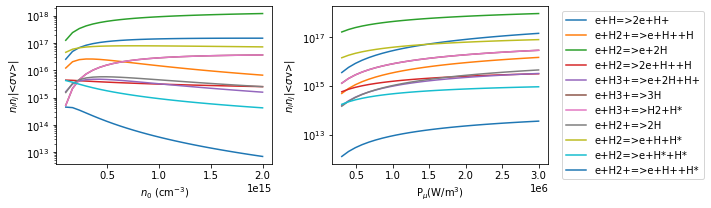

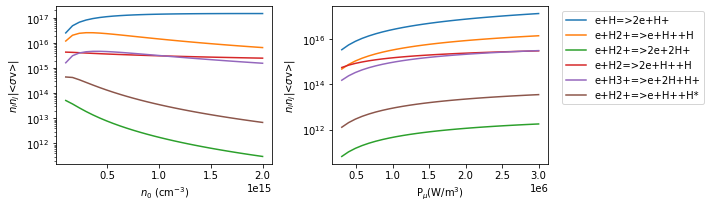

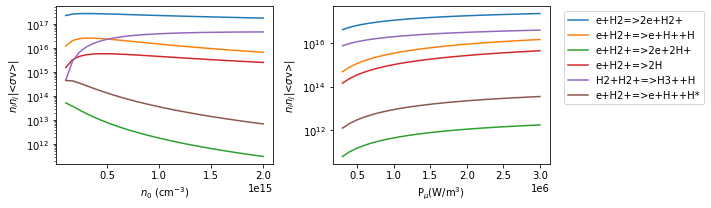

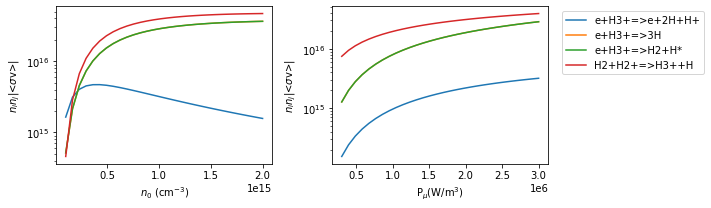

In [23]:
n0=1e15
pmin,pmax=3e5,3e6
p0=3e6
nmin,nmax=1e14,2e15
N=30
'''
_________________________________________________________________________________
'''
%matplotlib inline
fig,ax=plt.subplots(1,2,figsize=(10,3))
ps,names0,values0=gm.Contributions_p_sweep([mp,0],n0,pmin,pmax,N)
for i in range (values0[0,:].size):
    ax[1].plot(ps,abs(values0[:,i]),label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([mp,0],p0,nmin,nmax,N)
for i in range (values0[0,:].size):
    ax[0].plot(ns,abs(values0[:,i]),label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h.pdf')

fig,ax=plt.subplots(1,2,figsize=(10,3))
ps,names0,values0=gm.Contributions_p_sweep([mp,1],n0,pmin,pmax,N)
for i in range (values0[0,:].size):
    ax[1].plot(ps,abs(values0[:,i]),label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([mp,1],p0,nmin,nmax,N)
for i in range (values0[0,:].size):
    ax[0].plot(ns,abs(values0[:,i]),label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H+', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h+.pdf')


fig,ax=plt.subplots(1,2,figsize=(10,3))
ps,names0,values0=gm.Contributions_p_sweep([2*mp,1],n0,pmin,pmax,N)
for i in range (values0[0,:].size):
    ax[1].plot(ps,abs(values0[:,i]),label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([2*mp,1],p0,nmin,nmax,N)
for i in range (values0[0,:].size):
    ax[0].plot(ns,abs(values0[:,i]),label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H2+', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h2+.pdf')


fig,ax=plt.subplots(1,2,figsize=(10,3))
ps,names0,values0=gm.Contributions_p_sweep([3*mp,1],n0,pmin,pmax,N)
for i in range (values0[0,:].size):
    ax[1].plot(ps,abs(values0[:,i]),label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep([3*mp,1],p0,nmin,nmax,N)
for i in range (values0[0,:].size):
    ax[0].plot(ns,abs(values0[:,i]),label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$n_in_j$|<$\sigma$v>|')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
#fig.suptitle('Reactions involving H3+', fontsize=16)
plt.tight_layout()
plt.savefig('Figures/Contributions_h3+.pdf')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0.92, 'H3+ generation')

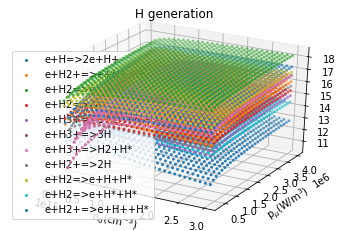

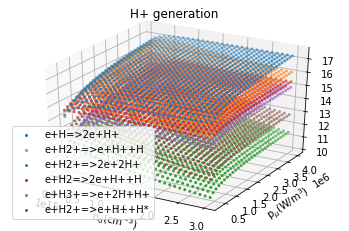

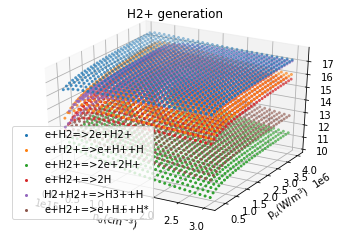

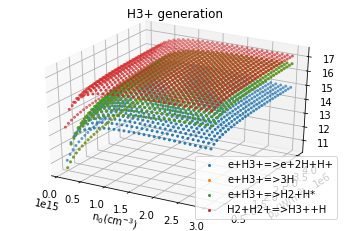

In [12]:
pmin,pmax=3e5,4e6
nmin,nmax=1e14,3e15
Np,Nn=30,30

'''
______________________________________________________________________________________
'''
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10

nn,pp,names0,values0=gm.Contributions_2D_sweep([mp,0],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values0[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values0[:,:,i])),s=4,label=names0[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H generation')

nn,pp,names1,values1=gm.Contributions_2D_sweep([mp,1],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values1[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values1[:,:,i])),s=4,label=names1[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H+ generation')

nn,pp,names2,values2=gm.Contributions_2D_sweep([2*mp,1],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values2[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values2[:,:,i])),s=4,label=names2[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H2+ generation')

nn,pp,names3,values3=gm.Contributions_2D_sweep([3*mp,1],pmin,pmax,nmin,nmax,Np,Nn)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range (values3[0,0,:].size):
    ax.scatter(nn,pp,np.log10(abs(values3[:,:,i])),s=4,label=names3[i])
plt.xlabel('n$_0$(cm$^{-3}$)')
plt.ylabel('p$_\mu$(W/m$^{3}$)')
plt.legend()
plt.title('H3+ generation')

### Absorción de energía

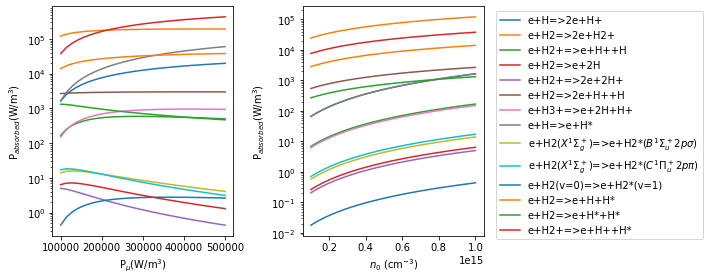

In [3]:
p0=5e5
nmin,nmax=1e14,1e15
n0=1e14
pmin,pmax=1e5,5e5
N=30
'''
___________________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(10,4))
ns,names0,values0=gm.Absortion_n_sweep(p0,nmin,nmax,N)
ps,names1,values1=gm.Absortion_p_sweep(n0,pmin,pmax,N)
for i in range(len(names0)):
    ax[1].plot(ns,values1[:,i],label=names0[i])
for i in range(len(names0)):
    ax[0].plot(ps,values0[:,i],label=names0[i])
ax[0].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('P$_{absorbed}$(W/m$^3$)')
ax[1].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('P$_{absorbed}$(W/m$^3$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig('Figures/Power_absortion.pdf')